## Steps I am planning 

1. EDA
2. Checking data type of columns
3. Measuring correlation
4. Doing univariate and bivariate analysis

#### Install package dependencies

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn import preprocessing
import tensorflow as tf
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### EDA

1. Check data types
2. Check nulls


In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#profile = ProfileReport(df, title="Pandas Profiling Report")
#profile.to_notebook_iframe()
# Uncomment to generate. This takes up some resources so be cautious
#profile.to_file("df_report.html")

Let us check the distribution of the sale price

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

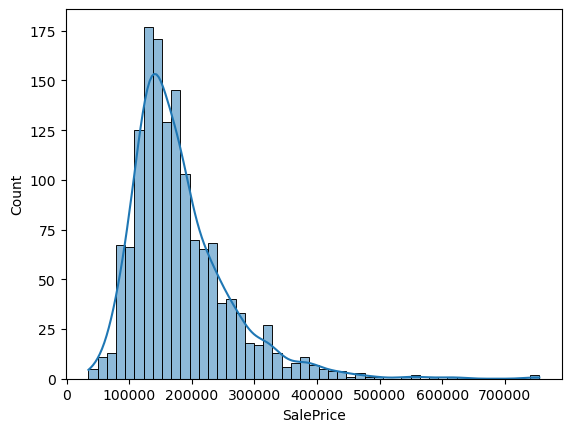

In [7]:
df['SalePrice'].describe()
sns.histplot(df['SalePrice'],kde=True)

In [8]:
df['SaleType'].head()

0    WD
1    WD
2    WD
3    WD
4    WD
Name: SaleType, dtype: object

Based on the type of algo used we may need to apply some sort of transformation. 
For example, if we are applying linear regression then we need to normalize the output variable.

Some columns can be paired together . This is called feature engineering. 

For example : 

1st Floor SF and 2nd Floor SF can be summed together to create a new variable. 


In [9]:
#df.columns[df.isna().any()].tolist()

nan_columns=df.columns[df.isna().sum() > 0]
df[nan_columns].isna().sum()


LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

1. Based on above will be removing MiscFeature,Fence,PoolQC,FireplaceQu,Alley      
2. Impute LotFrontage by mean

In [10]:
#1
df.drop(['MiscFeature','Fence','PoolQC','FireplaceQu','Alley'],axis=1,inplace=True)
#2
# Imputation is done after the categorical columns have been dummy encoded



In [11]:
'''
nan_columns.tolist()
df.drop(nan_columns.tolist(),axis=1,inplace=True)
'''

'\nnan_columns.tolist()\ndf.drop(nan_columns.tolist(),axis=1,inplace=True)\n'

In [12]:
cols=[col for col in df.columns if col not in ['SalePrice','Id']]
y=df['SalePrice']

In [13]:
x=df[cols]

#### Need to morph input so that the neural networks accepts it as an argument

1. Find categorical variables. Do either 1-hot encoding or dummy encoding


In [14]:
categorical_cols=[i for i in df.columns if df[i].dtype=='object']

In [15]:
df_test=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
df_test_copy=df_test.copy()
nan_columns=df_test.columns[df_test.isna().sum() > 0]
df_test[nan_columns].isna().sum()

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

Test data also has similar distribution in terms of nulls so I will apply same null handling techniques as I applied on the train data frame

In [16]:

df_test.drop(['MiscFeature','Fence','PoolQC','FireplaceQu','Alley','Id'],axis=1,inplace=True)
categorical_cols=[i for i in df_test.columns if df_test[i].dtype=='object']
df_test=pd.get_dummies(data=df_test,columns=categorical_cols)







In [17]:
x=pd.get_dummies(data=x,columns=categorical_cols)
x_drop=set(x.columns)-set(df_test.columns)
x_drop=list(x_drop)
x.drop(x_drop,axis=1,inplace=True)

In [18]:
imp = IterativeImputer(max_iter=10, random_state=0)
x_reshaped=imp.fit_transform(x)

Standardized the features of the neural network



In [19]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x_reshaped)

In [20]:
y=np.array(y)
y=y.reshape(-1, 1)
min_max_scaler_y = preprocessing.MinMaxScaler()
y = min_max_scaler_y.fit_transform(y)

In [21]:
y

array([[0.24107763],
       [0.20358284],
       [0.26190807],
       ...,
       [0.321622  ],
       [0.14890293],
       [0.15636717]])

In [22]:
df_test_reshaped=imp.fit_transform(df_test)
df_test_scaled = min_max_scaler.fit_transform(df_test_reshaped)

### Validation split 

1. Required if you are doing hyperparameter tuning
2. Before putting model into production you need a sense of how your algorithm is doing

In [23]:
x_train,y_val,x_test,y_val_test=train_test_split(x_scaled,y,test_size=0.2)

#### Building a neural network. There are two ways to build a tensorflow model 

* A. You can use the sequential approach or the pipeline approach as I like to call it
* B. You can extend a tensorflow model class and then define the layers, dropout or the callbacks in the build method.



In [24]:
# Add a dropout layer

model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(300,activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(60,'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))          
model.add(tf.keras.layers.Dense(1,activation='linear'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='mse',metrics=['mse','mae'])
hist=model.fit(x_train, x_test, batch_size=16, epochs=20,validation_data=(y_val,y_val_test))

#model.summary()
# This builds the model for the first time


Epoch 1/20
73/73 [==============================] - 5s 11ms/step - loss: 1.1854 - mse: 1.1854 - mae: 0.8538 - val_loss: 0.0395 - val_mse: 0.0395 - val_mae: 0.1581
Epoch 2/20
73/73 [==============================] - 0s 4ms/step - loss: 0.5496 - mse: 0.5496 - mae: 0.5866 - val_loss: 0.0931 - val_mse: 0.0931 - val_mae: 0.2558
Epoch 3/20
73/73 [==============================] - 0s 4ms/step - loss: 0.3306 - mse: 0.3306 - mae: 0.4575 - val_loss: 0.0885 - val_mse: 0.0885 - val_mae: 0.2526
Epoch 4/20
73/73 [==============================] - 0s 4ms/step - loss: 0.2680 - mse: 0.2680 - mae: 0.4064 - val_loss: 0.0513 - val_mse: 0.0513 - val_mae: 0.1785
Epoch 5/20
73/73 [==============================] - 0s 4ms/step - loss: 0.1892 - mse: 0.1892 - mae: 0.3467 - val_loss: 0.0458 - val_mse: 0.0458 - val_mae: 0.1740
Epoch 6/20
73/73 [==============================] - 0s 4ms/step - loss: 0.1470 - mse: 0.1470 - mae: 0.3042 - val_loss: 0.0390 - val_mse: 0.0390 - val_mae: 0.1593
Epoch 7/20
73/73 [=========

In [25]:
test_output=model.predict(df_test_scaled)

46/46 [==============================] - 0s 2ms/step


In [26]:
test_output

array([[0.10697097],
       [0.25197378],
       [0.22197476],
       ...,
       [0.16094601],
       [0.17034611],
       [0.22357932]], dtype=float32)

In [27]:
scaled_output=min_max_scaler_y.inverse_transform(test_output)

In [28]:
#scaled_output
df_test_copy['Id']

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [29]:
submission_df=pd.DataFrame(scaled_output,columns=['SalePrice'],index=df_test_copy['Id'])

In [30]:
submission_df.to_csv('submission.csv')